In [ ]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('label.csv')

In [ ]:
def convert(polarity):
  if polarity == 'positive':
    return 1
  elif polarity == 'neutral':
    return 0
  else:
    return -1

In [ ]:
df.head()

,Unnamed: 0,tweet_dt,id,username,name,tweet,label
0,0,15/4/2021,1.380000e+18,t65lang,Tlang 🇪🇺🇮🇹,Gig Economy flexible freedom wage slavery,positive
1,1,15/4/2021,1.380000e+18,shaar666,shäär⁶⁶⁶,gig economy bullshit,negative
2,2,15/4/2021,1.380000e+18,RoryMachell,Cool Guy who loves his friends & Big Boss,Bro Kojima predicted we just love gig economy ...,positive
3,3,15/4/2021,1.380000e+18,jasonschumaker,Jason Schumaker,part three our series on gig economy Senior M...,neutral
4,4,15/4/2021,1.380000e+18,MarxistSaint,Kevin Creagh,gig economy hits young people hardest Most yo...,negative


In [ ]:
df['Polarity'] = df['label'].apply(convert)

In [ ]:
df.head()

,Unnamed: 0,tweet_dt,id,username,name,tweet,label,Polarity
0,0,15/4/2021,1.380000e+18,t65lang,Tlang 🇪🇺🇮🇹,Gig Economy flexible freedom wage slavery,positive,1
1,1,15/4/2021,1.380000e+18,shaar666,shäär⁶⁶⁶,gig economy bullshit,negative,-1
2,2,15/4/2021,1.380000e+18,RoryMachell,Cool Guy who loves his friends & Big Boss,Bro Kojima predicted we just love gig economy ...,positive,1
3,3,15/4/2021,1.380000e+18,jasonschumaker,Jason Schumaker,part three our series on gig economy Senior M...,neutral,0
4,4,15/4/2021,1.380000e+18,MarxistSaint,Kevin Creagh,gig economy hits young people hardest Most yo...,negative,-1


In [ ]:
X = df['tweet']
y = df['Polarity']

In [ ]:
bow_transformer = CountVectorizer()
print(df['tweet'].shape)
X = bow_transformer.fit_transform(df['tweet'].apply(lambda x: np.str_(x)))

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print("Amount of Non-Zero occurence: ", X.nnz)

filename1 = 'count_vectorized1.pkl'
pickle.dump(bow_transformer, open(filename1, 'wb'))

tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

filename1 = 'tfid_transform1.pkl'
pickle.dump(tf_transform, open(filename1, 'wb'))




(2000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (2000, 5245)
Amount of Non-Zero occurence:  24223
(2000, 5245)


In [ ]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 0.23091515729265968


In [ ]:
#SPLITTING DATA
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.76      0.23      0.36       107
           0       0.68      0.44      0.53       117
           1       0.58      0.96      0.72       176

    accuracy                           0.61       400
   macro avg       0.67      0.54      0.54       400
weighted avg       0.66      0.61      0.57       400



In [ ]:
from sklearn import svm

# Split dataset into training and testing sets.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Instantiate SVM object
clf = svm.SVC(kernel='linear')

# Train model on training data
clf.fit(X_train, y_train)

# Predict trained model on test data
prediction = clf.predict(X_test)

# Calculate the performance
rsquared = clf.score(X_test, y_test)

print('The R-Squared score for SVM model is {:.2f}%'.format(rsquared*100))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.65      0.41      0.50       107
           0       0.58      0.75      0.65       117
           1       0.73      0.75      0.74       176

    accuracy                           0.66       400
   macro avg       0.65      0.64      0.63       400
weighted avg       0.67      0.66      0.65       400



In [ ]:
from sklearn.model_selection import cross_val_score

cv_results_naive = cross_val_score(nb, X, df['label'], cv =10)
cv_results_svm = cross_val_score(clf, X, df['label'], cv =10)

print('The cross validation result for naive bayes classification is {:.2f}%'.format(np.mean(cv_results_naive)*100))
print('The cross validation result for svm classification is {:.2f}%'.format(np.mean(cv_results_svm)*100))

The cross validation result for naive bayes classification is 55.75%
The cross validation result for svm classification is 63.55%


In [ ]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
with open('classification.csv', 'w') as f:
  for line in s:
    f.write(line)

In [ ]:
#naive bayes
print(accuracy_score(y_test, preds))

0.6125


In [ ]:
#svm
print(accuracy_score(y_test, prediction))

0.66


In [ ]:
accuracy = accuracy_score(y_test, preds)
a = np.asarray([accuracy])
np.savetxt("accuracy.csv",a , delimiter=",", fmt = "%s")

In [ ]:
final = df[['tweet_dt', 'username','tweet', 'label', 'Polarity']]

In [ ]:
final.to_csv('hasil_analisis.csv')

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
filename = 'model_analisis.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.6125


In [ ]:
loaded_model.predict(X_test)

array([ 1,  1,  0,  1,  1,  1,  1,  0, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  1, -1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1,
        1, -1,  0,  1,  1,  0,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0, -1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  1,  0,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  1,  0,  1,  0, -1,  0,  0,  1,  1,  1,  1,  0,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  1,  1,
        0, -1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  1,  1,  1,
        0,  1,  1,  0,  1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from matplotlib import cm
from pylab import rcParams

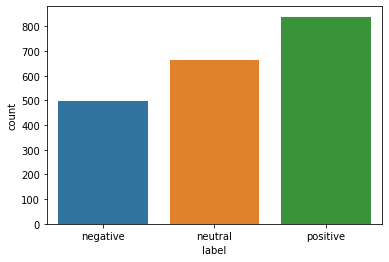

In [ ]:
sns.countplot(x='label',data=final,order=['negative','neutral','positive'])
figsize=(10,6)
plt.show()

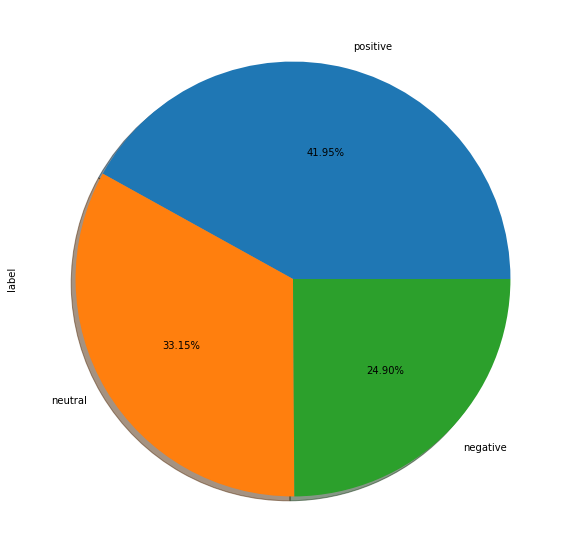

In [ ]:
df['label'].value_counts().plot(kind='pie', figsize=(15, 10), autopct='%1.2f%%', shadow=True)